In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [3]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df[df['LIMIT_BAL'] == 0]['LIMIT_BAL'].count()

0

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [8]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

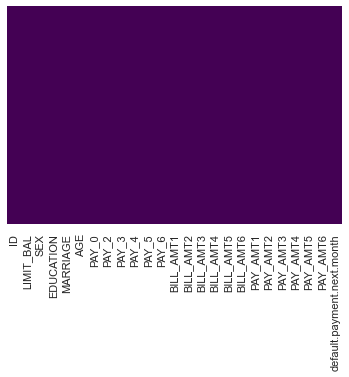

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [10]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [11]:
df['AGE'].duplicated().sum()

29944

In [12]:
df.rename(columns={'default.payment.next.month':'IS_DEFAULT', 'PAY_0': 'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [17]:
df.rename(columns={'PAY_0' :'PAY_1', 'default.payment.next.month':'IS_DEFAULT'}, inplace=True)

In [18]:
df.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IS_DEFAULT'],
      dtype='object')

In [19]:
df.nunique()

ID            30000
LIMIT_BAL        81
SEX               2
EDUCATION         7
MARRIAGE          4
AGE              56
PAY_1            11
PAY_2            11
PAY_3            11
PAY_4            11
PAY_5            10
PAY_6            10
BILL_AMT1     22723
BILL_AMT2     22346
BILL_AMT3     22026
BILL_AMT4     21548
BILL_AMT5     21010
BILL_AMT6     20604
PAY_AMT1       7943
PAY_AMT2       7899
PAY_AMT3       7518
PAY_AMT4       6937
PAY_AMT5       6897
PAY_AMT6       6939
IS_DEFAULT        2
dtype: int64

In [52]:
cat = []
for i in list(df.columns):
    if i.startswith('P'):
        cat.append(i)
category= cat[:5]

category

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [63]:
catg = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in catg:
    df[col] = df[col].astype('category')

In [64]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          30000 non-null  int64   
 1   LIMIT_BAL   30000 non-null  float64 
 2   SEX         30000 non-null  category
 3   EDUCATION   30000 non-null  category
 4   MARRIAGE    30000 non-null  category
 5   AGE         30000 non-null  category
 6   PAY_1       30000 non-null  category
 7   PAY_2       30000 non-null  category
 8   PAY_3       30000 non-null  category
 9   PAY_4       30000 non-null  category
 10  PAY_5       30000 non-null  category
 11  PAY_6       30000 non-null  category
 12  BILL_AMT1   30000 non-null  float64 
 13  BILL_AMT2   30000 non-null  float64 
 14  BILL_AMT3   30000 non-null  float64 
 15  BILL_AMT4   30000 non-null  float64 
 16  BILL_AMT5   30000 non-null  float64 
 17  BILL_AMT6   30000 non-null  float64 
 18  PAY_AMT1    30000 non-null  float64 
 19  PAY_

NoneType

In [70]:
numericals = list(df.drop(catg, axis=1).columns)
for i in numericals:
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          30000 non-null  int64   
 1   LIMIT_BAL   30000 non-null  float64 
 2   SEX         30000 non-null  category
 3   EDUCATION   30000 non-null  category
 4   MARRIAGE    30000 non-null  category
 5   AGE         30000 non-null  category
 6   PAY_1       30000 non-null  category
 7   PAY_2       30000 non-null  category
 8   PAY_3       30000 non-null  category
 9   PAY_4       30000 non-null  category
 10  PAY_5       30000 non-null  category
 11  PAY_6       30000 non-null  category
 12  BILL_AMT1   30000 non-null  float64 
 13  BILL_AMT2   30000 non-null  float64 
 14  BILL_AMT3   30000 non-null  float64 
 15  BILL_AMT4   30000 non-null  float64 
 16  BILL_AMT5   30000 non-null  float64 
 17  BILL_AMT6   30000 non-null  float64 
 18  PAY_AMT1    30000 non-null  float64 
 19  PAY_

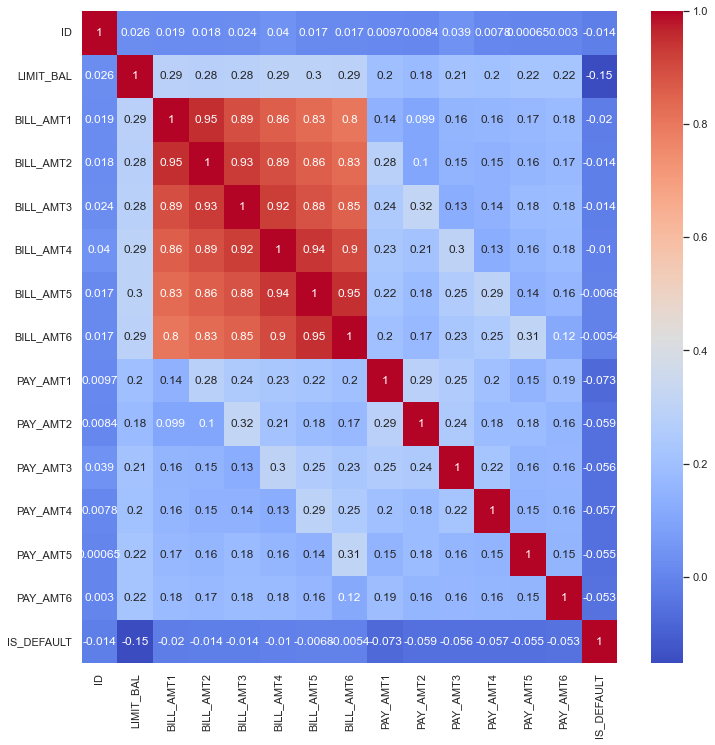

In [76]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True )
plt.show()

In [77]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'IS_DEFAULT'],
      dtype='object')

In [78]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [79]:
df['IS_DEFAULT'].astype('category')

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: IS_DEFAULT, Length: 30000, dtype: category
Categories (2, int64): [0, 1]

In [81]:
def_ = ['IS_DEFAULT']
for i in def_:
    df[i] = df[i].astype('category')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          30000 non-null  int64   
 1   LIMIT_BAL   30000 non-null  float64 
 2   SEX         30000 non-null  category
 3   EDUCATION   30000 non-null  category
 4   MARRIAGE    30000 non-null  category
 5   AGE         30000 non-null  category
 6   PAY_1       30000 non-null  category
 7   PAY_2       30000 non-null  category
 8   PAY_3       30000 non-null  category
 9   PAY_4       30000 non-null  category
 10  PAY_5       30000 non-null  category
 11  PAY_6       30000 non-null  category
 12  BILL_AMT1   30000 non-null  float64 
 13  BILL_AMT2   30000 non-null  float64 
 14  BILL_AMT3   30000 non-null  float64 
 15  BILL_AMT4   30000 non-null  float64 
 16  BILL_AMT5   30000 non-null  float64 
 17  BILL_AMT6   30000 non-null  float64 
 18  PAY_AMT1    30000 non-null  float64 
 19  PAY_